Great, that's it! Now let's look at LIME explanations.

We'll go through SHAP after.

Explanation on biased f:
 [('race=0', -0.9985850339903871), ('c_charge_degree_M=1', -5.280132437814562e-05), ('sex_Male=0', -2.6496252707675385e-05)] 


Explanation on adversarial model:
 [('unrelated_column=-1', 0.9975104838154394), ('c_charge_degree_F=-1', -0.0014156355858731214), ('c_charge_degree_M=1', -0.0012750399563753836)] 

Prediction fidelity: 1.0


### LIME Results
What we have is the top three features of the explanation on the biased model followed by the explanation on that same instance using the adversarial model. We see that the top feature is now the randomly drawn column, indicating that the attack was able to fool LIME. We also see that the adversarial model predicts this instance _the same_ as the biased model (fidelity=1)â€”although the model predicts the same results, its reasoning has changed.

Next, let's look at the SHAP adversarial model.  We'll go through a similar process as above except using SHAP.

In [6]:
# Train the adversarial model
adv_shap = Adversarial_Kernel_SHAP_Model(racist_model_f(), innocuous_model_psi()).\
            train(xtrain, ytrain, feature_names=features)

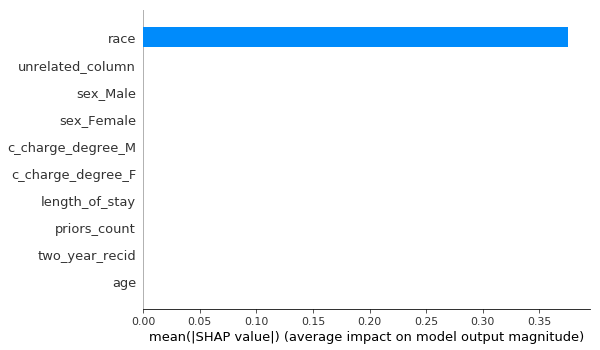

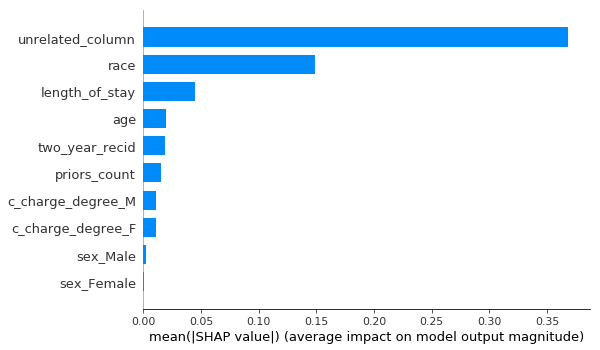

Fidelity: 1.0


In [7]:
# Set the background distribution for the shap explainer using kmeans
background_distribution = shap.kmeans(xtrain,10)

# Let's use the shap kernel explainer and grab a point to explain
to_examine = np.random.choice(xtest.shape[0])

# Explain the biased model
biased_kernel_explainer = shap.KernelExplainer(racist_model_f().predict, background_distribution)
biased_shap_values = biased_kernel_explainer.shap_values(xtest[to_examine:to_examine+1])

# Explain the adversarial model
adv_kerenel_explainer = shap.KernelExplainer(adv_shap.predict, background_distribution)
adv_shap_values = adv_kerenel_explainer.shap_values(xtest[to_examine:to_examine+1])

# Plot it using SHAP's plotting features.
shap.summary_plot(biased_shap_values, feature_names=features, plot_type="bar")
shap.summary_plot(adv_shap_values, feature_names=features, plot_type="bar")

print ("Fidelity: {0:3.2}".format(adv_shap.fidelity(xtest[to_examine:to_examine+1])))

### SHAP Results
The first plot is SHAP applied to the biased model.  The second plot is SHAP applied to the adversarial model.  These plots give a summary of the SHAP values for each feature.  We see the randomly drawn column looks like it has
much more impact on the model than race does now, though race still looks important.  We also see that adversarial model predicts this instance the same as the biased model.

### Commentary
What do these results mean? It's _possible_ for an adversary to exploit perturabtion based post hoc explanation techniques like LIME and SHAP.  In safety concerned situations, it is prudent _not_ to trust post hoc explanations given by LIME and SHAP because adversaries can potentially exploit their explanations.